# Stroke dataset EDA and classification

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data explanation

#### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Columns:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Categorical variables
Working with categorical variables as objects might be difficult. Let's see what values do the columns have

In [4]:
print('Gender: ' + str(data['gender'].unique()))
print('Ever_married: ' + str(data['ever_married'].unique()))
print('Work_type: ' + str(data['work_type'].unique()))
print('Residence_type: ' + str(data['Residence_type'].unique()))
print('Smoking_status: ' + str(data['smoking_status'].unique()))

Gender: ['Male' 'Female' 'Other']
Ever_married: ['Yes' 'No']
Work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
Smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Some categories can be switched to 0 and 1 (like Ever_married: ['Yes' 'No']) for others we can use One Hot Encoding - create a new column per category with 0 and 1 depending if the row meets the category.
Let's also switch some of the column names for better readability.

In [5]:
data_encoded = pd.get_dummies(data, columns=['gender', ])
data_encoded = pd.get_dummies(data_encoded, columns=['work_type', ])
# data_encoded = pd.get_dummies(data_encoded, columns=['Residence_type', ])
data_encoded = pd.get_dummies(data_encoded, columns=['smoking_status', ])
data_encoded['ever_married'] = data_encoded['ever_married'].map({'Yes': 1, 'No': 0})
data_encoded['Residence_type'] = data_encoded['Residence_type'].map({'Urban': 1, 'Rural': 0})

data_encoded.rename({'gender_Female':'is_female',
                    'gender_Male': 'is_male',
                    'gender_Other': 'is_nonbinary',
                    'work_type_Private': 'work_private',
                    'work_type_Self-employed': 'work_self_employed',
                    'work_type_children': 'work_children',
                    'work_type_Govt_job': 'work_govt',
                    'work_type_Never_worked': 'work_never',
                    'Residence_type': 'lives_urban',
                    'smoking_status_Unknown': 'smoking_unknown',
                    'smoking_status_formerly smoked': 'smoking_formerly',
                    'smoking_status_never smoked': 'smoking_never',
                    'smoking_status_smokes': 'smoking_currently'}, axis=1, inplace=True)

data_encoded

,id,age,hypertension,heart_disease,ever_married,lives_urban,avg_glucose_level,bmi,stroke,is_female,is_male,is_nonbinary,work_govt,work_never,work_private,work_self_employed,work_children,smoking_unknown,smoking_formerly,smoking_never,smoking_currently
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,1,83.75,NaN,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,44873,81.0,0,0,1,1,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,19723,35.0,0,0,1,0,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


In [6]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   age                 5110 non-null   float64
 2   hypertension        5110 non-null   int64  
 3   heart_disease       5110 non-null   int64  
 4   ever_married        5110 non-null   int64  
 5   lives_urban         5110 non-null   int64  
 6   avg_glucose_level   5110 non-null   float64
 7   bmi                 4909 non-null   float64
 8   stroke              5110 non-null   int64  
 9   is_female           5110 non-null   uint8  
 10  is_male             5110 non-null   uint8  
 11  is_nonbinary        5110 non-null   uint8  
 12  work_govt           5110 non-null   uint8  
 13  work_never          5110 non-null   uint8  
 14  work_private        5110 non-null   uint8  
 15  work_self_employed  5110 non-null   uint8  
 16  work_c

## Missing values
As we can see there are 201 NaN values in the BMI column. There are two ways of treating them:
1. Dropping rows with missing values
2. Extrapolating them


Almost 4% of data has missing values, it's a little to significant to drop so let's fill them using k Nearest Neighbours algorithm.

In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(data_encoded)
# assigning to df[:] is a trick to return dataframe instead of np array
data_encoded[:] = imputer.transform(data_encoded)

In [8]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   float64
 1   age                 5110 non-null   float64
 2   hypertension        5110 non-null   float64
 3   heart_disease       5110 non-null   float64
 4   ever_married        5110 non-null   float64
 5   lives_urban         5110 non-null   float64
 6   avg_glucose_level   5110 non-null   float64
 7   bmi                 5110 non-null   float64
 8   stroke              5110 non-null   float64
 9   is_female           5110 non-null   float64
 10  is_male             5110 non-null   float64
 11  is_nonbinary        5110 non-null   float64
 12  work_govt           5110 non-null   float64
 13  work_never          5110 non-null   float64
 14  work_private        5110 non-null   float64
 15  work_self_employed  5110 non-null   float64
 16  work_c

In [9]:
data_encoded.head()

,id,age,hypertension,heart_disease,ever_married,lives_urban,avg_glucose_level,bmi,stroke,is_female,is_male,is_nonbinary,work_govt,work_never,work_private,work_self_employed,work_children,smoking_unknown,smoking_formerly,smoking_never,smoking_currently
0,9046.0,67.0,0.0,1.0,1.0,1.0,228.69,36.60,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,1.0,0.0,202.21,28.08,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,1.0,0.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,1.0,1.0,171.23,34.40,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis

### Finding outliers
Firstly we would like to see what values do the numeric columns take. We'll use boxplot - it shows us how the values are spread.

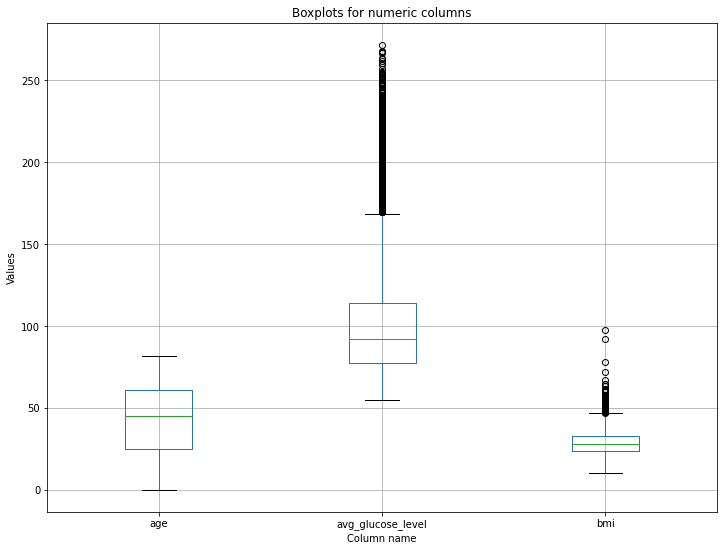

In [17]:
data_encoded[['age', 'avg_glucose_level', 'bmi']].boxplot(figsize=(12,9))
plt.title('Boxplots for numeric columns')
plt.xlabel('Column name')
plt.ylabel('Values')
plt.show()

As we can see, age has no outliers and takes values from 0 to 75. It seems that the data is correct.
As for the avg_glucose_level and bmi we can see that the values are more spread and have a lot of outliers. In order to judge if they are plausible we need to do some research on the topics.

According to the wikipedia page on hyperglacemia (https://en.wikipedia.org/wiki/Hyperglycemia) a value of 300mg/dL can occur (we assume that is the unit used in the dataset). 

For the BMI - on the Medicover (Polish healthcare provider) site (https://odchudzanie.medicover.pl/wskaznik-bmi-stopnie-otylosci/) we can see that BMI > 100 is classified as class 10 obesity. This means that olthough the values are very high, they are plausible.

To conclude, after research we found out that all the values listed in the dataset are plausible. This means that we do not need to modify the data.